<a href="https://colab.research.google.com/github/devhyunjun/TIL/blob/master/regresssion_0519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymysql
import pandas as pd
import numpy as np
db= pymysql.connect(
    host="ec2-15-152-249-56.ap-northeast-3.compute.amazonaws.com", user="mt-1", password="1111", db="zigbang_project", charset="utf8")
# cursor = conn.cursor()
df = pd.read_sql("SELECT * FROM zb_final", db, index_col='id')
# result = cursor.fetchall()
# for record in result:
#     print(record)
db.close()

<ipython-input-3-49908c170f6e>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM zb_final", db, index_col='id')


# 1. Feature engineering 

In [ ]:
df_col_list = df.columns.to_list()
df_col_list

['service_type',
 'address1',
 'address2',
 '_floor',
 'size_m2',
 'sales_type',
 'rent',
 'deposit',
 'manage_cost',
 'manage_cost_inc',
 'manage_cost_count',
 'elevator',
 'room_direction_text',
 'images',
 'parking',
 'near_subways',
 'near_subways_count',
 'options',
 'options_count',
 'description',
 'title',
 'add1',
 'add2',
 'add3',
 'supermarket_dist',
 'convenience_store_dist',
 'school_dist',
 'subway_dist',
 'cultural_venue_dist',
 'public_institution_dist',
 'hospital_dist',
 'x_w84',
 'y_w84',
 'sgg_cd',
 'emd_cd_2022',
 'emd_cd_2020',
 'sido_nm',
 'sgg_nm',
 'emd_nm',
 'building_total',
 'building_dandok_p',
 'building_apt_p',
 'building_yeonlip_p',
 'building_dasedae_p',
 'building_nonresidential_p',
 'building_others_p',
 'ppltn_total',
 'gender_ratio',
 'ppltn_foreign_domestic_ratio',
 'ppltn_upper_65_p',
 'aging',
 'aged',
 'post_aged',
 'ppltn_dnsty',
 'corp_to_pop',
 'ppltn_adult_p',
 'hhd_member_avg',
 'hhd_total',
 'hhd_collective_p',
 'hhd_private_p',
 'hhd_fami

In [ ]:
df['deposit+rent'] = df['deposit']*0.07/12 + df['rent']
df.head(3)

,service_type,address1,address2,_floor,size_m2,sales_type,rent,deposit,manage_cost,manage_cost_inc,...,convenience_per_ppltn,shopping_per_ppltn,grocery_per_ppltn,restaurant_per_ppltn,medical_per_ppltn,culture_per_ppltn,gym_per_ppltn,ppltn_net_migration_rate,safety_idx,deposit+rent
id,,,,,,,,,,,,,,,,,,,,,
36293764,원룸,경기도 동두천시 생연동,225-16,3,24.79,월세,28,300,7.0,"가스, 수도, 인터넷, TV",...,57.833,142.358,330.316,1593.745,316.97,25.58,93.423,-0.043,24.0,29.750000
36576214,원룸,경기도 동두천시 생연동,678-90,5,16.53,월세,30,300,5.0,"인터넷, TV",...,57.833,142.358,330.316,1593.745,316.97,25.58,93.423,-0.043,24.0,31.750000
36533474,원룸,경기도 동두천시 생연동,678-56,6,43.87,월세,50,500,5.0,"인터넷, TV",...,57.833,142.358,330.316,1593.745,316.97,25.58,93.423,-0.043,24.0,52.916667


In [ ]:
# 방향 점수 구하기 
def get_room_direction_score(row):
    if row['room_direction_text'] == '남향':
        return 3
    elif row['room_direction_text'] in ['남동향', '남서향']:
        return 2
    elif row['room_direction_text'] in ['동향', '서향']:
        return 1
    else:
        return 0

# apply the function to each row of the DataFrame to create a new column named 'room_direction_score'
df['room_direction_score'] = df.apply(get_room_direction_score, axis=1)

In [ ]:
# 옵션 갯수, 지하철 수 숫자로 변환
df['manage_cost_inc_num'] = df['manage_cost_inc'].str.split(',').apply(len)
df['near_subways_num'] = df['near_subways'].str.split(',').apply(len)

In [ ]:
# 매물 변수 drop
df.drop('manage_cost_inc', axis=1, inplace=True)
df.drop('near_subways', axis=1, inplace=True)
df.drop('options', axis=1, inplace=True)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"
import seaborn as sns
from datetime import datetime

In [ ]:

# 읍면동 주거유형 갯수에서 비율로
df['tenure_self_ratio'] = df['tenure_self'] / df['tenure_total']
df['tenure_jeonse_ratio'] = df['tenure_jeonse'] / df['tenure_total']
df['tenure_free_ratio'] = df['tenure_free'] / df['tenure_total']
df['tenure_monthly_ratio'] = df['tenure_monthly'] / df['tenure_total']

# 주거유형 갯수 drop
df.drop(['tenure_self', 'tenure_jeonse', 'tenure_free', 'tenure_monthly'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['service_type', 'address1', 'address2', '_floor', 'size_m2',
       'sales_type', 'rent', 'deposit', 'manage_cost', 'manage_cost_count',
       'elevator', 'room_direction_text', 'images', 'parking',
       'near_subways_count', 'options_count', 'description', 'title', 'add1',
       'add2', 'add3', 'supermarket_dist', 'convenience_store_dist',
       'school_dist', 'subway_dist', 'cultural_venue_dist',
       'public_institution_dist', 'hospital_dist', 'x_w84', 'y_w84', 'sgg_cd',
       'emd_cd_2022', 'emd_cd_2020', 'sido_nm', 'sgg_nm', 'emd_nm',
       'building_total', 'building_dandok_p', 'building_apt_p',
       'building_yeonlip_p', 'building_dasedae_p', 'building_nonresidential_p',
       'building_others_p', 'ppltn_total', 'gender_ratio',
       'ppltn_foreign_domestic_ratio', 'ppltn_upper_65_p', 'aging', 'aged',
       'post_aged', 'ppltn_dnsty', 'corp_to_pop', 'ppltn_adult_p',
       'hhd_member_avg', 'hhd_total', 'hhd_collective_p', 'hhd_private_p',
       'hhd_family

In [ ]:
def get_floor_score(row):
    if row['_floor'] == 1:
        return 0
    elif row['_floor']==2:
        return 1
    else:
        return 2
df['room_floor_score'] = df.apply(get_floor_score, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34247 entries, 36293764 to 36386612
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   service_type                  34247 non-null  object 
 1   address1                      34247 non-null  object 
 2   address2                      34247 non-null  object 
 3   _floor                        34247 non-null  int64  
 4   size_m2                       34247 non-null  float64
 5   sales_type                    34247 non-null  object 
 6   rent                          34247 non-null  int64  
 7   deposit                       34247 non-null  int64  
 8   manage_cost                   34247 non-null  float64
 9   manage_cost_count             34247 non-null  int64  
 10  elevator                      34247 non-null  int64  
 11  room_direction_text           34247 non-null  object 
 12  images                        34247 non-null  obje

In [ ]:
# 문자열, 코드 등 회귀변수 안쓰는 변수 drop
drop_columns = ['address1', 'address2', '_floor' , 'room_direction_text', 'images',
        'description', 'title', 'add1', 'add2', 'add3', 'sgg_cd',
        'emd_cd_2022',
        'emd_cd_2020',
        'sido_nm',
        'sgg_nm',
        'emd_nm', 
        'building_total',
        'hhd_total'
         ]

# 카테고리(원핫?) : sales_type

# 시군구 컬럼들 'tenure_total', 'app_dasedae','ssg_ppltn',
#        'app_dandok', 'app_nonresidential', 'app_apt', 'app_yeonlip',
#        'app_officetel', 'park_per_area', 'green_per_area', 'dust_level',
#        'ssg_ppltn', 'convenience_per_ppltn', 'shopping_per_ppltn',
#        'grocery_per_ppltn', 'restaurant_per_ppltn', 'medical_per_ppltn',
#        'culture_per_ppltn', 'gym_per_ppltn', 'ppltn_net_migration_rate',
#        'safety_idx',

# 읍면동 총인구 'ppltn_total'

In [ ]:
# 안쓰는 변수 drop 된 df 정의
df =  df.drop(drop_columns, axis=1, inplace=False)

In [ ]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(len(num_col))

68


In [ ]:
# 관리비 100 이상 말이 안됨 -> 원세랑 비교
df[df['manage_cost']>100]
df=df.drop(df[df['manage_cost']>100].index)


df[df['rent']>1000]
df=df.drop(df[df['rent']>1000].index)

df[df['size_m2']>150]
df=df.drop(df[df['size_m2']>150].index)
# print(df['size'].quantile(q=0.999))

df[(df['service_type']=='원룸')&(df['size_m2']>120)] # 120 -> 40평
df=df.drop(df[(df['service_type']=='원룸')&(df['size_m2']>120)].index)
# df[(df['service_type']=='원룸')&(df['size']>40)]


df[(df['service_type']=='원룸')&(df['size_m2']>99)]
df=df.drop(df[(df['service_type']=='원룸')&(df['size_m2']>99)].index)
# df[(df['service_type']=='원룸')&(df['size']>30)]

df[df['manage_cost']>50]
df=df.drop(df[(df['service_type']=='원룸')&(df['manage_cost']>50)].index)
# df[(df['service_type']=='원룸')&(df['manage_cost']>50)]
# df[df['size']>50]


In [ ]:
# df['green_per_area'].quantile(q=0.999))
# df[(df['green_per_area']>13.111)]

In [ ]:
# # 이상치
# # boxplot으로 이상치 확인
# fig, axes = plt.subplots(len(num_col),1, figsize = (8, 85))
# row=0
# for i in num_col:
#     sns.boxplot(data = df, x = i, ax = axes[row])
#     row+=1
# plt.tight_layout()
# plt.show()

In [ ]:
df['ppltn_foreign_domestic_ratio'].quantile(q=0.999)
df[(df['green_per_area']>0.961)]

,service_type,size_m2,sales_type,rent,deposit,manage_cost,manage_cost_count,elevator,parking,near_subways_count,...,safety_idx,deposit+rent,room_direction_score,manage_cost_inc_num,near_subways_num,tenure_self_ratio,tenure_jeonse_ratio,tenure_free_ratio,tenure_monthly_ratio,room_floor_score
id,,,,,,,,,,,,,,,,,,,,,
36293764,원룸,24.79,월세,28,300,7.0,4,0,1,2,...,24.0,29.750000,3,4,2,0.610950,0.116828,0.033293,0.238929,2
36576214,원룸,16.53,월세,30,300,5.0,2,1,1,3,...,24.0,31.750000,1,2,3,0.610950,0.116828,0.033293,0.238929,2
36533474,원룸,43.87,월세,50,500,5.0,2,1,1,3,...,24.0,52.916667,1,2,3,0.610950,0.116828,0.033293,0.238929,2
36485939,빌라,72.73,월세,110,3000,5.0,0,1,1,2,...,24.0,127.500000,2,1,2,0.610950,0.116828,0.033293,0.238929,2
36485528,원룸,23.14,월세,40,500,5.0,2,1,1,3,...,24.0,42.916667,1,2,3,0.610950,0.116828,0.033293,0.238929,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36557272,빌라,33.06,월세,55,1000,3.0,0,0,1,2,...,12.0,60.833333,0,1,2,0.579756,0.188986,0.027125,0.204133,1
36492163,빌라,52.89,월세,60,2000,2.0,0,0,1,1,...,12.0,71.666667,2,1,1,0.579756,0.188986,0.027125,0.204133,0
36504430,빌라,35.83,월세,40,500,2.0,0,0,1,1,...,12.0,42.916667,1,1,1,0.579756,0.188986,0.027125,0.204133,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34208 entries, 36293764 to 36386612
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   service_type                  34208 non-null  object 
 1   size_m2                       34208 non-null  float64
 2   sales_type                    34208 non-null  object 
 3   rent                          34208 non-null  int64  
 4   deposit                       34208 non-null  int64  
 5   manage_cost                   34208 non-null  float64
 6   manage_cost_count             34208 non-null  int64  
 7   elevator                      34208 non-null  int64  
 8   parking                       34208 non-null  int64  
 9   near_subways_count            34208 non-null  int64  
 10  options_count                 34208 non-null  int64  
 11  supermarket_dist              34208 non-null  float64
 12  convenience_store_dist        34208 non-null  floa

****** 사전 테스트

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_test = pd.get_dummies(df)

X = df_test.drop(['deposit+rent','deposit','rent'],axis=1)
y = df_test['deposit+rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, randoms_state=42)

# lr = LinearRegression()
# lr.fit(X_train, y_train)

# print(lr.score(X_train, y_train))
# print(lr.score(X_test, y_test))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
lin_polyreg = LinearRegression()
lin_polyreg.fit(X_train_poly, y_train)

print(lin_polyreg.score(X_train_poly, y_train))
print(lin_polyreg.score(X_test_poly, y_test))

0.8483841407869698
-44.88906460622348


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train_poly, y_train)

print(elastic_net.score(X_train_poly, y_train))
print(elastic_net.score(X_test_poly, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.370e+06, tolerance: 4.503e+03
  model = cd_fast.enet_coordinate_descent(


0.8125261219160078
0.8122007018438397


In [ ]:
elastic_net = ElasticNet(alpha = 10, l1_ratio = 0.5)
elastic_net.fit(X_train_poly, y_train)

print(elastic_net.score(X_train_poly, y_train))
print(elastic_net.score(X_test_poly, y_test))

0.7991392932944754
0.8002899386006734


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.720e+06, tolerance: 4.503e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X_train_poly, y_train)

print(elastic_net.score(X_train_poly, y_train))
print(elastic_net.score(X_test_poly, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.119e+06, tolerance: 4.503e+03
  model = cd_fast.enet_coordinate_descent(


0.8214237023161385
0.8213288274589614


In [ ]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.3)
elastic_net.fit(X_train_poly, y_train)

print(elastic_net.score(X_train_poly, y_train))
print(elastic_net.score(X_test_poly, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+06, tolerance: 4.503e+03
  model = cd_fast.enet_coordinate_descent(


0.8220182819689915
0.8218164874543673


In [ ]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.2)
elastic_net.fit(X_train_poly, y_train)

print(elastic_net.score(X_train_poly, y_train))
print(elastic_net.score(X_test_poly, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.080e+06, tolerance: 4.503e+03
  model = cd_fast.enet_coordinate_descent(


0.8223446202900785
0.8220581367136397


In [ ]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.1)
elastic_net.fit(X_train_poly, y_train)

print(elastic_net.score(X_train_poly, y_train))
print(elastic_net.score(X_test_poly, y_test))

KeyboardInterrupt: ignored

### Polynomial (degree=2)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X_train_poly, y_train)

print(elastic_net.score(X_train_poly, y_train))
print(elastic_net.score(X_test_poly, y_test))

In [ ]:
##RIDGE
ridge_reg = Ridge(alpha = 1)
ridge_reg.fit(X_train_poly, y_train)

print(ridge_reg.score(X_train_poly, y_train))
print(ridge_reg.score(X_test_poly, y_test))

In [ ]:
##LASSO
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train_poly, y_train)

print(lasso_reg.score(X_train_poly, y_train))
print(lasso_reg.score(X_test_poly, y_test))

In [ ]:
##ElasticNet
elastic_net = ElasticNet(alpha = 10.0, l1_ratio = 0.5, scoring = 'neg_mean_squared_error')
elastic_net.fit(X_train_poly, y_train)

print(f"{elastic_net.score(X_train_poly, y_train)}")
print(f"{elastic_net.score(X_test_poly, y_test)}")


# ##ElasticNet
# elastic_net = ElasticNet(alpha = 10.0, l1_ratio = 0.5)
# elastic_net.fit(X_train_poly, y_train)
# print(f"{elastic_net.score(X_train_poly, y_train)}")
# print(f"{elastic_net.score(X_test_poly, y_test)}")

# param_grid = {
#     'alpha': [0.1, 1.0, 10.0],
#     'l1_ratio' : [0.25, 0.5, 0.75]
# }

In [ ]:
##ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X_train_poly, y_train)

print(elastic_net.score(X_train_poly, y_train))
print(elastic_net.score(X_test_poly, y_test))

-> 변수를 줄이면 안된다

In [ ]:
# 그리드 서치 파라미터 설정
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Ridge 모델에 대한 GridSearchCV 수행
ridge_grid_search = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, cv=5, scoring = 'neg_mean_squared_error', refit = True)
ridge_grid_search.fit(X_train_poly, y_train)

print("Ridge - Best Score:", ridge_grid_search.best_score_)
print("Ridge - Best Parameters:", ridge_grid_search.best_params_)

In [ ]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio' : [0.25, 0.5, 0.75]
}

# ElasticNet 모델에 대한 GridSearchCV 수행
elastic_net_grid_search = GridSearchCV(estimator=ElasticNet(tol = 0.001,max_iter=2000), param_grid=param_grid, cv=5, scoring = 'neg_mean_squared_error')
elastic_net_grid_search.fit(X_train_poly, y_train)

print("elastic_net - Best Score:", elastic_net_grid_search.best_score_)
print("elastic_net - Best Parameters:", elastic_net_grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.085e+06, tolerance: 3.515e+04
  model = cd_fast.enet_coordinate_descent(


KeyboardInterrupt: ignored

In [ ]:
best_ridge_lr = ridge_grid_search.best_estimator_

In [ ]:
## LARS
from sklearn.linear_model import Lars

Lars_reg = Lars(n_nonzero_coefs=2)
Lars_reg.fit(X_train_poly, y_train)

print(Lars_reg.score(X_train_poly, y_train))
print(Lars_reg.score(X_test_poly, y_test))

# 2. 상관관계 확인
- 2-1. corr
- 2-2. heatmap

### 2-1. corr

In [ ]:
# import seaborn as sns


# sns.pairplot(df, diag_kind="kde")

In [ ]:
# df_encoded = pd.get_dummies(df)
# df_encoded.iloc[:,-5:]=df_encoded.iloc[:,-5:].astype(int)
# df_encoded.info()

### ⭐Q to hyunjun - options_num, subway_num이런 것도 빼야하는가..?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34208 entries, 36293764 to 36386612
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   service_type                  34208 non-null  object 
 1   size_m2                       34208 non-null  float64
 2   sales_type                    34208 non-null  object 
 3   rent                          34208 non-null  int64  
 4   deposit                       34208 non-null  int64  
 5   manage_cost                   34208 non-null  float64
 6   manage_cost_count             34208 non-null  int64  
 7   elevator                      34208 non-null  int64  
 8   parking                       34208 non-null  int64  
 9   near_subways_count            34208 non-null  int64  
 10  options_count                 34208 non-null  int64  
 11  supermarket_dist              34208 non-null  float64
 12  convenience_store_dist        34208 non-null  float64
 

In [ ]:
# df_num: categorical data 제거

col_dropped = ['service_type','sales_type','manage_cost_count','elevator','parking','room_direction_score','safety_idx',
               'near_subways_count','options_count','manage_cost_inc_num','near_subways_num','room_floor_score','deposit','rent']

df_num= df.drop(col_dropped,axis=1)


![image.png](attachment:image.png)

In [ ]:
cor = df_num.corr()
cor_target = abs(cor['deposit+rent'])

## ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐
col_low_cor = cor_target[cor_target<0.2].index
## ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

# df_highcor: 가격과 상관관계가 0.2 이하인 변수를 df_num에서 제거

df_highcor = df_num.drop(col_low_cor,axis=1)
df_highcor.shape

(34208, 16)

### 2-2. heatmap

In [ ]:
df_highcor

,size_m2,manage_cost,x_w84,gender_ratio,corp_to_pop,app_dandok,app_apt,app_yeonlip,convenience_per_ppltn,restaurant_per_ppltn,medical_per_ppltn,gym_per_ppltn,deposit+rent,tenure_self_ratio,tenure_jeonse_ratio,tenure_monthly_ratio
id,,,,,,,,,,,,,,,,
36293764,24.79,7.0,127.061945,1.016,0.055,36.8,27.1,30.4,57.833,1593.745,316.970,93.423,29.750000,0.610950,0.116828,0.238929
36576214,16.53,5.0,127.053083,0.972,0.096,36.8,27.1,30.4,57.833,1593.745,316.970,93.423,31.750000,0.610950,0.116828,0.238929
36533474,43.87,5.0,127.053141,0.972,0.096,36.8,27.1,30.4,57.833,1593.745,316.970,93.423,52.916667,0.610950,0.116828,0.238929
36485939,72.73,5.0,127.058746,1.027,0.109,36.8,27.1,30.4,57.833,1593.745,316.970,93.423,127.500000,0.610950,0.116828,0.238929
36485528,23.14,5.0,127.055081,0.957,0.058,36.8,27.1,30.4,57.833,1593.745,316.970,93.423,42.916667,0.610950,0.116828,0.238929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36557272,33.06,3.0,127.298289,1.007,0.091,36.6,28.0,25.5,24.365,1045.524,234.903,78.683,60.833333,0.579756,0.188986,0.204133
36492163,52.89,2.0,127.283806,1.007,0.091,36.6,28.0,25.5,24.365,1045.524,234.903,78.683,71.666667,0.579756,0.188986,0.204133
36504430,35.83,2.0,127.289113,1.007,0.091,36.6,28.0,25.5,24.365,1045.524,234.903,78.683,42.916667,0.579756,0.188986,0.204133


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


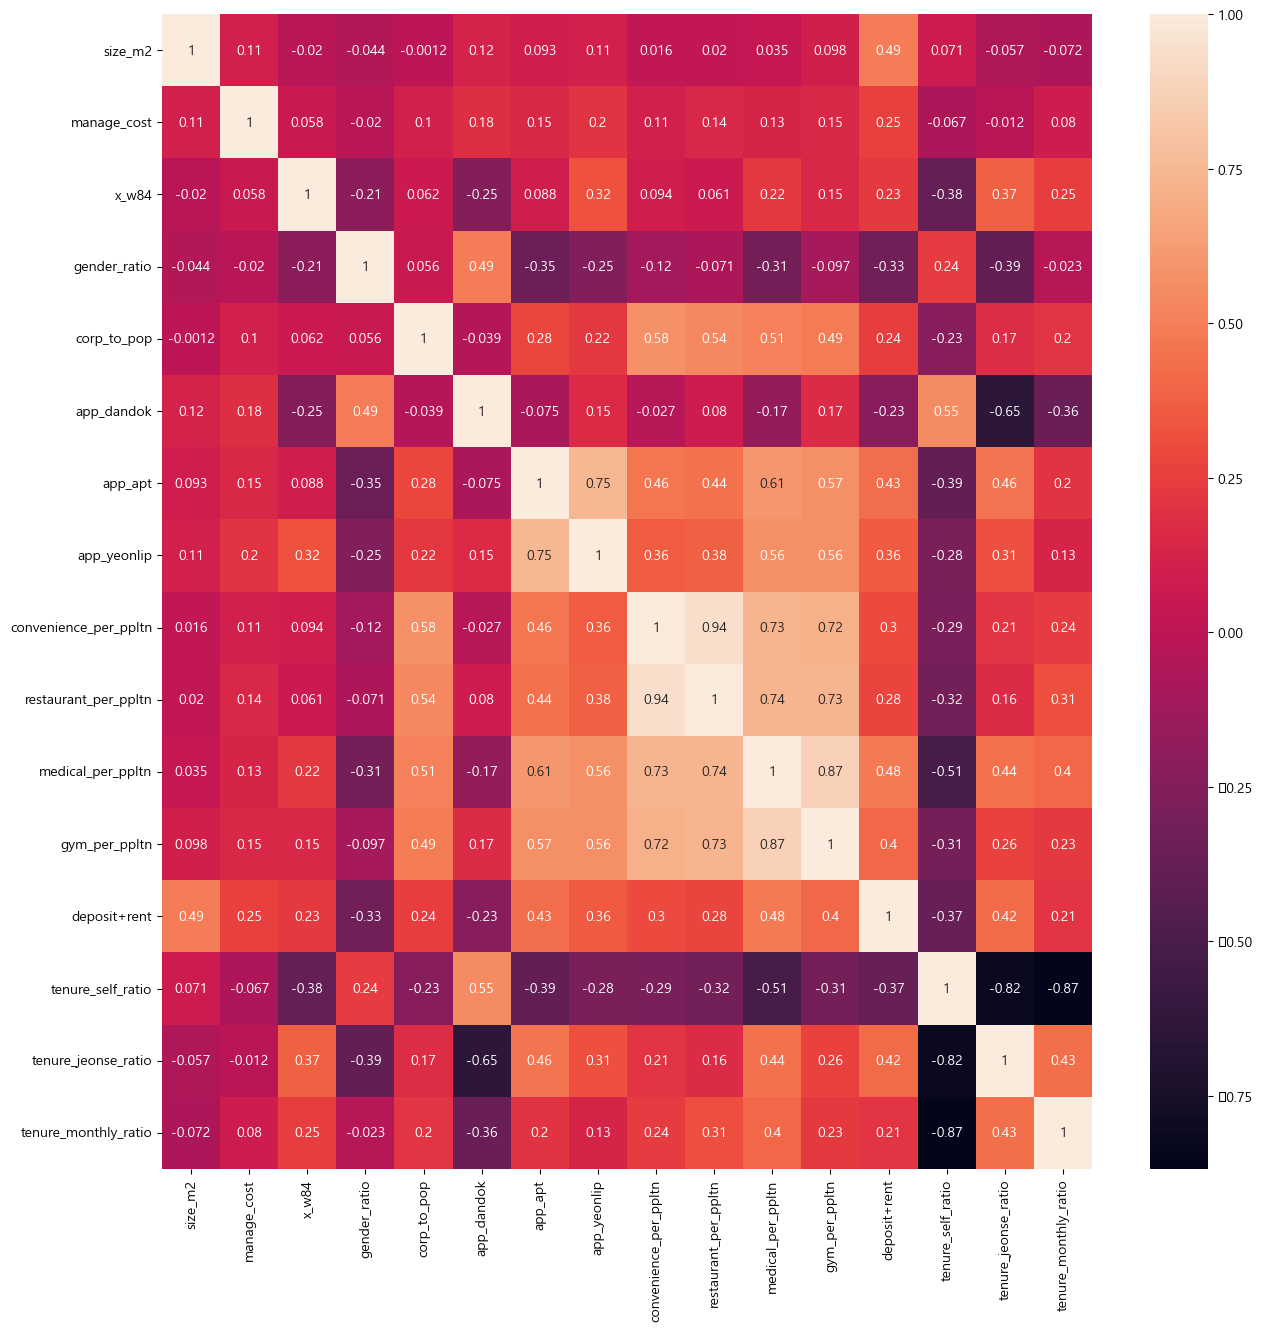

In [ ]:
#  visualization (corr)
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
plt.figure(figsize=(15,15))
sns.heatmap(df_highcor.corr(), annot=True)

# 3.다중 공선성 확인
- VIF 변수 선택법 (의존적인 변수 삭제)
- PCA (의존적인 성분 삭제)
- 정규화

In [ ]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 확인 함수
def vif(df):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) 
                        for i in range(df.shape[1])]
    vif["features"] = df.columns
    return vif


vif = vif(df_highcor.drop(['deposit+rent'],axis=1))
vif.sort_values(by='VIF Factor', ascending=False)

,VIF Factor,features
2,19758.940098,x_w84
12,5302.375150,tenure_self_ratio
14,1672.354372,tenure_monthly_ratio
13,978.741989,tenure_jeonse_ratio
6,571.641881,app_apt
5,179.750501,app_dandok
7,123.253445,app_yeonlip
3,121.785561,gender_ratio
11,117.560449,gym_per_ppltn
9,101.322827,restaurant_per_ppltn


In [ ]:
# 다중공선성 높은 피처 
## ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐
high_vif_col = vif[vif['VIF Factor']>10].features
## ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

# len(high_vif_col)
# print(high_vif_col)

2                     x_w84
3              gender_ratio
5                app_dandok
6                   app_apt
7               app_yeonlip
8     convenience_per_ppltn
9      restaurant_per_ppltn
10        medical_per_ppltn
11            gym_per_ppltn
12        tenure_self_ratio
13      tenure_jeonse_ratio
14     tenure_monthly_ratio
Name: features, dtype: object


In [ ]:
df_final = df.drop(col_low_cor,axis=1)
df_final = df.drop(high_vif_col, axis=1)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34208 entries, 36293764 to 36386612
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   service_type                  34208 non-null  object 
 1   size_m2                       34208 non-null  float64
 2   sales_type                    34208 non-null  object 
 3   rent                          34208 non-null  int64  
 4   deposit                       34208 non-null  int64  
 5   manage_cost                   34208 non-null  float64
 6   manage_cost_count             34208 non-null  int64  
 7   elevator                      34208 non-null  int64  
 8   parking                       34208 non-null  int64  
 9   near_subways_count            34208 non-null  int64  
 10  options_count                 34208 non-null  int64  
 11  supermarket_dist              34208 non-null  float64
 12  convenience_store_dist        34208 non-null  float64
 

# 원핫인코딩

In [ ]:
# 합친 데이터 -> 원핫 인코딩
df_final=pd.get_dummies(df_final, dtype=int)
# , dtype=int

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34208 entries, 36293764 to 36386612
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   size_m2                       34208 non-null  float64
 1   rent                          34208 non-null  int64  
 2   deposit                       34208 non-null  int64  
 3   manage_cost                   34208 non-null  float64
 4   manage_cost_count             34208 non-null  int64  
 5   elevator                      34208 non-null  int64  
 6   parking                       34208 non-null  int64  
 7   near_subways_count            34208 non-null  int64  
 8   options_count                 34208 non-null  int64  
 9   supermarket_dist              34208 non-null  float64
 10  convenience_store_dist        34208 non-null  float64
 11  school_dist                   34208 non-null  float64
 12  subway_dist                   34208 non-null  float64
 

******다중공선성 제거 후 테스트

In [ ]:
# # 스케일링
# from sklearn.preprocessing import StandardScaler

# df_encoded_X = df_encoded.drop('deposit+rent',axis=1)
# df_encoded_y = df_encoded['deposit+rent']

# scaler = StandardScaler()
# df_scaled_X= scaler.fit_transform(df_encoded_X)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_final.drop('deposit+rent',axis=1)
y = df_final['deposit+rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42,shuffle=True)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

1.0
1.0


In [ ]:
from sklearn.model_selection import cross_val_score


lr_reg = LinearRegression()

scores = cross_val_score(lr_reg, X , y, scoring='r2', cv=5)

print('교차 검증별 정확도:', scores)
print('평균 검증 정확도:', round(np.mean(scores),4))

교차 검증별 정확도: [1. 1. 1. 1. 1.]
평균 검증 정확도: 1.0
